### Project Name: NEO Distance & Frequency Tracker



#### This project explores the behavior of Near-Earth Objects (NEOs) based on NASA’s CNEOS close-approach data. We investigate trends over time, estimate asteroid sizes, and explore potential risks using various data visualizations.

#### Step-by-step EDA based on cneos_close_approach_data.csv

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Set Seaborn style for all plots

In [5]:
sns.set(style='whitegrid')

#### Loading the datset


In [6]:
data=pd.read_csv("/Users/hrituparnaghosh/Documents/cneos_close_approach_data.csv")
print(data)



             des orbit_id            jd                 cd      dist  \
0         509352       57  2.415024e+06  1900-Jan-04 22:25  0.009632   
1     2014 SC324       56  2.415031e+06  1900-Jan-11 01:07  0.039965   
2     2012 UK171       54  2.415032e+06  1900-Jan-12 23:02  0.049706   
3       2024 BA5        3  2.415045e+06  1900-Jan-25 06:22  0.026434   
4       2024 BW1        6  2.415045e+06  1900-Jan-25 19:29  0.037979   
...          ...      ...           ...                ...       ...   
1995      468910       80  2.423662e+06  1923-Aug-30 20:33  0.041090   
1996    2020 PT4        9  2.423673e+06  1923-Sep-10 13:02  0.011713   
1997    2022 SE4        2  2.423676e+06  1923-Sep-13 12:16  0.045424   
1998    2011 TB4       17  2.423701e+06  1923-Oct-08 12:08  0.021846   
1999   2021 SJ88        1  2.423702e+06  1923-Oct-09 02:24  0.049945   

      dist_min  dist_max      v_rel      v_inf t_sigma_f      h  
0     0.009625  0.009639   8.686711   8.654807     00:02  20.16  
1  

#### Rename columns to more descriptive names


In [7]:
data.rename(columns={
    'des': 'Name',
    'cd': 'Close Approach Date',
    'dist': 'Miss Distance (LD)',
    'v_rel': 'Relative Velocity (km/s)',
    'dist_min': 'Minimum Distance (LD)',
    'dist_max': 'Maximum Distance (LD)',
    'v_inf': 'Velocity Infinity (km/s)',
    'h': 'Absolute Magnitude',
    't_sigma_f': 'Time Uncertainty',
    'jd': 'Julian Date'
}, inplace=True)
print(data)

            Name orbit_id   Julian Date Close Approach Date  \
0         509352       57  2.415024e+06   1900-Jan-04 22:25   
1     2014 SC324       56  2.415031e+06   1900-Jan-11 01:07   
2     2012 UK171       54  2.415032e+06   1900-Jan-12 23:02   
3       2024 BA5        3  2.415045e+06   1900-Jan-25 06:22   
4       2024 BW1        6  2.415045e+06   1900-Jan-25 19:29   
...          ...      ...           ...                 ...   
1995      468910       80  2.423662e+06   1923-Aug-30 20:33   
1996    2020 PT4        9  2.423673e+06   1923-Sep-10 13:02   
1997    2022 SE4        2  2.423676e+06   1923-Sep-13 12:16   
1998    2011 TB4       17  2.423701e+06   1923-Oct-08 12:08   
1999   2021 SJ88        1  2.423702e+06   1923-Oct-09 02:24   

      Miss Distance (LD)  Minimum Distance (LD)  Maximum Distance (LD)  \
0               0.009632               0.009625               0.009639   
1               0.039965               0.039906               0.040025   
2               0.049

#### Preview the dataset

In [8]:
print("\nFirst 6 rows")
print(data.head(6))


First 6 rows
         Name orbit_id   Julian Date Close Approach Date  Miss Distance (LD)  \
0      509352       57  2.415024e+06   1900-Jan-04 22:25            0.009632   
1  2014 SC324       56  2.415031e+06   1900-Jan-11 01:07            0.039965   
2  2012 UK171       54  2.415032e+06   1900-Jan-12 23:02            0.049706   
3    2024 BA5        3  2.415045e+06   1900-Jan-25 06:22            0.026434   
4    2024 BW1        6  2.415045e+06   1900-Jan-25 19:29            0.037979   
5        4660      277  2.415049e+06   1900-Jan-29 18:09            0.020798   

   Minimum Distance (LD)  Maximum Distance (LD)  Relative Velocity (km/s)  \
0               0.009625               0.009639                  8.686711   
1               0.039906               0.040025                 10.652428   
2               0.049578               0.049834                  7.153496   
3               0.011310               0.198644                  8.436204   
4               0.010125               0

#### check structure


In [9]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   orbit_id                  2000 non-null   object 
 2   Julian Date               2000 non-null   float64
 3   Close Approach Date       2000 non-null   object 
 4   Miss Distance (LD)        2000 non-null   float64
 5   Minimum Distance (LD)     2000 non-null   float64
 6   Maximum Distance (LD)     2000 non-null   float64
 7   Relative Velocity (km/s)  2000 non-null   float64
 8   Velocity Infinity (km/s)  2000 non-null   float64
 9   Time Uncertainty          2000 non-null   object 
 10  Absolute Magnitude        1999 non-null   float64
dtypes: float64(7), object(4)
memory usage: 172.0+ KB


#### checking summary statistics

In [10]:
print("\nStatistical Description:")
print(data.describe())


Statistical Description:
        Julian Date  Miss Distance (LD)  Minimum Distance (LD)  \
count  2.000000e+03         2000.000000            2000.000000   
mean   2.419323e+06            0.031941               0.026866   
std    2.513492e+03            0.012091               0.013766   
min    2.415024e+06            0.000347               0.000011   
25%    2.417141e+06            0.023108               0.015815   
50%    2.419279e+06            0.033896               0.028022   
75%    2.421522e+06            0.042006               0.038177   
max    2.423702e+06            0.049999               0.049997   

       Maximum Distance (LD)  Relative Velocity (km/s)  \
count            2000.000000               2000.000000   
mean                0.059750                 10.661727   
std                 0.052869                  5.419177   
min                 0.001562                  0.459950   
25%                 0.030292                  6.812698   
50%                 0.042622   

#### checking for missing values

In [11]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Name                        0
orbit_id                    0
Julian Date                 0
Close Approach Date         0
Miss Distance (LD)          0
Minimum Distance (LD)       0
Maximum Distance (LD)       0
Relative Velocity (km/s)    0
Velocity Infinity (km/s)    0
Time Uncertainty            0
Absolute Magnitude          1
dtype: int64


#### Convert date column to datetime format

In [22]:
data['Close Approach Date'] = pd.to_datetime(data['Close Approach Date'], errors='coerce')

#### Drop rows with null dates or distances

In [24]:
data.dropna(subset=['Close Approach Date', 'Miss Distance (LD)'], inplace=True)

#### Convert distances and velocities to numeric

In [30]:
cols_to_numeric = ['Miss Distance (LD)', 'Relative Velocity (km/s)', 'Absolute Magnitude']
for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Relative Velocity (km/s)'] = pd.to_numeric(data['Relative Velocity (km/s)'], errors='coerce')


#### Drop rows with missing or invalid numeric data

In [9]:
data.dropna(subset=['Miss Distance (LD)', 'Relative Velocity (km/s)'], inplace=True)


#### Calculate Estimated Diameter from Absolute Magnitude

In [44]:
albedo = 0.14
data['Estimated Diameter (km)'] = (1329 / np.sqrt(albedo)) * (10 ** (-0.2 * data['Absolute Magnitude']))


#### Extract year

In [12]:
data['Close Approach Date'] = pd.to_datetime(data['Close Approach Date'], errors='coerce')
data['Year'] = data['Close Approach Date'].dt.year

#### =====================  Asteroid frequency per year =====================

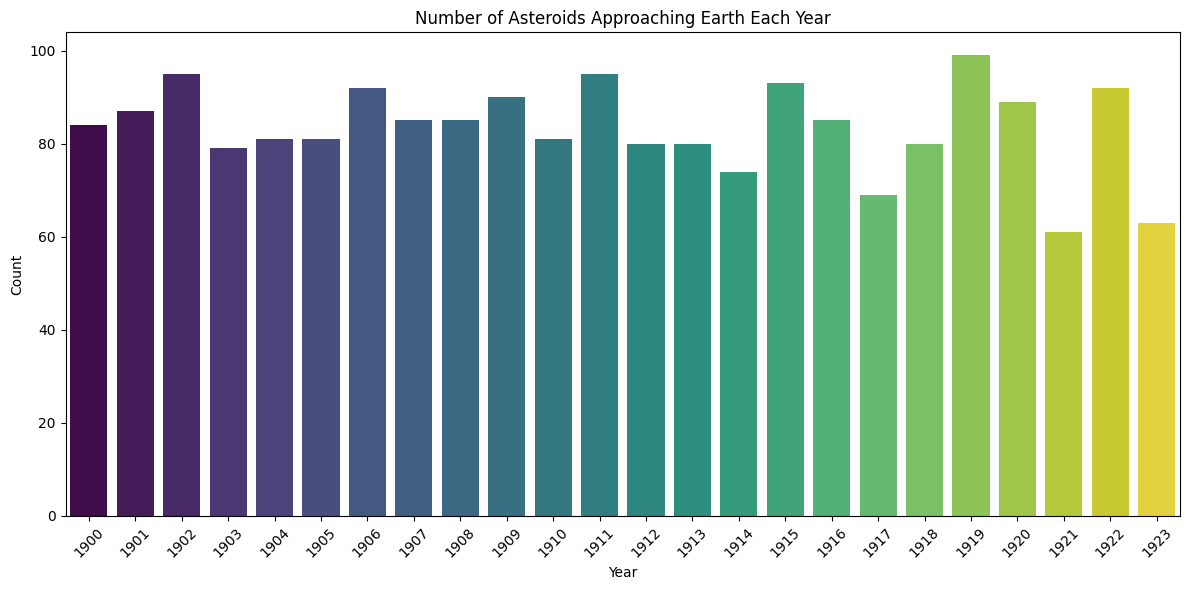

In [34]:
yearly_counts = data['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(
    x=yearly_counts.index,
    y=yearly_counts.values,
    hue=yearly_counts.index,  
    palette='viridis',
    legend=False              
)

plt.title('Number of Asteroids Approaching Earth Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("yearly_asteroid_frequency.png")
plt.show()

#### Basic distribution of close approaches by year

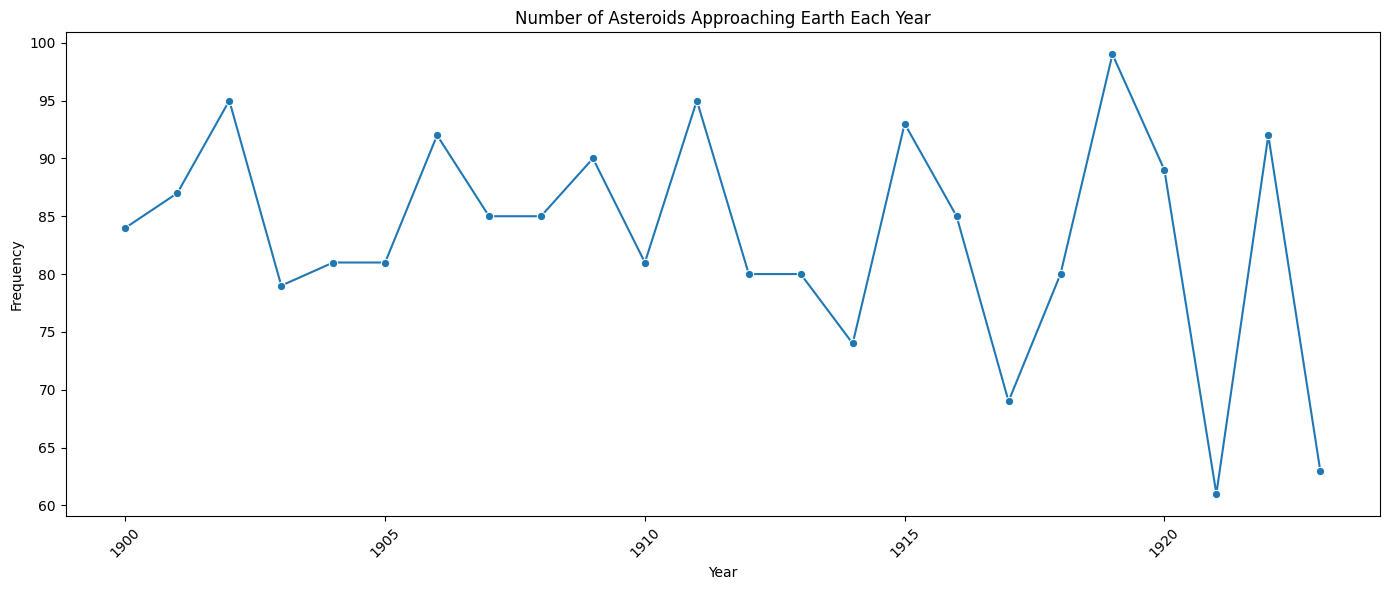

In [14]:
yearly_freq = data['Year'].value_counts().sort_index()
plt.figure(figsize=(14,6))
sns.lineplot(x=yearly_freq.index, y=yearly_freq.values, marker='o')
plt.title('Number of Asteroids Approaching Earth Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Closest approaches per year

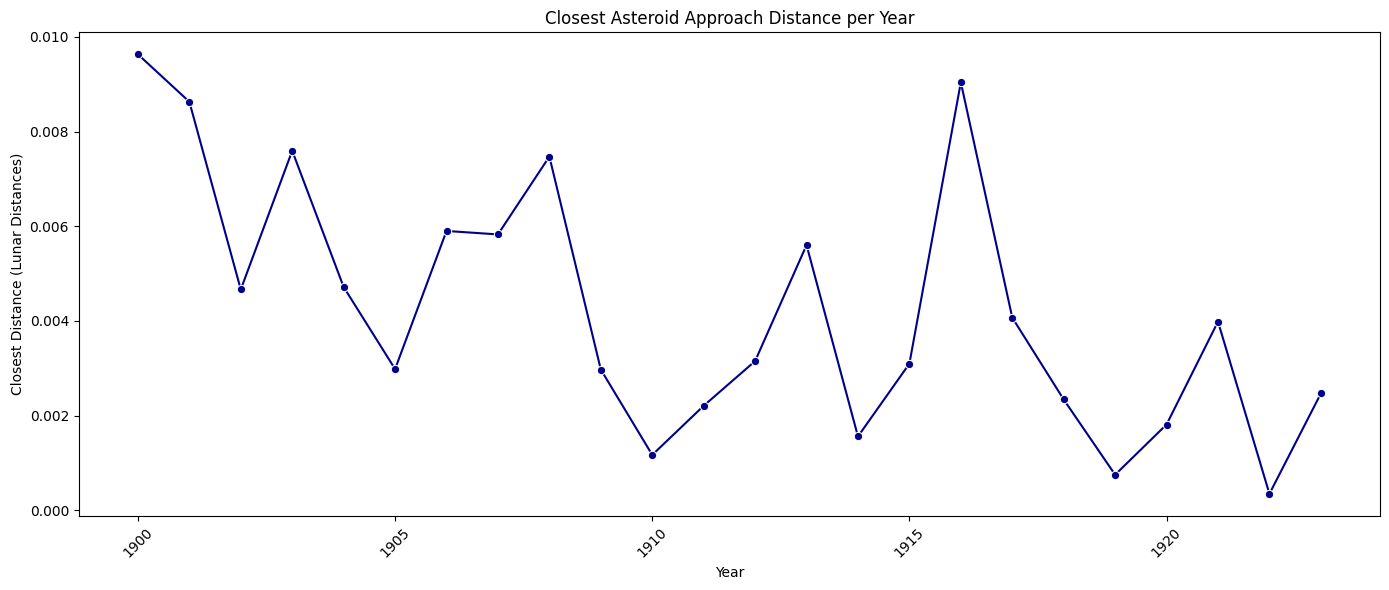

In [17]:
closest_per_year = data.groupby('Year')['Miss Distance (LD)'].min()
plt.figure(figsize=(14,6))
sns.lineplot(x=closest_per_year.index, y=closest_per_year.values, color='darkblue', marker='o')
plt.title('Closest Asteroid Approach Distance per Year')
plt.xlabel('Year')
plt.ylabel('Closest Distance (Lunar Distances)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Velocity trend over the years

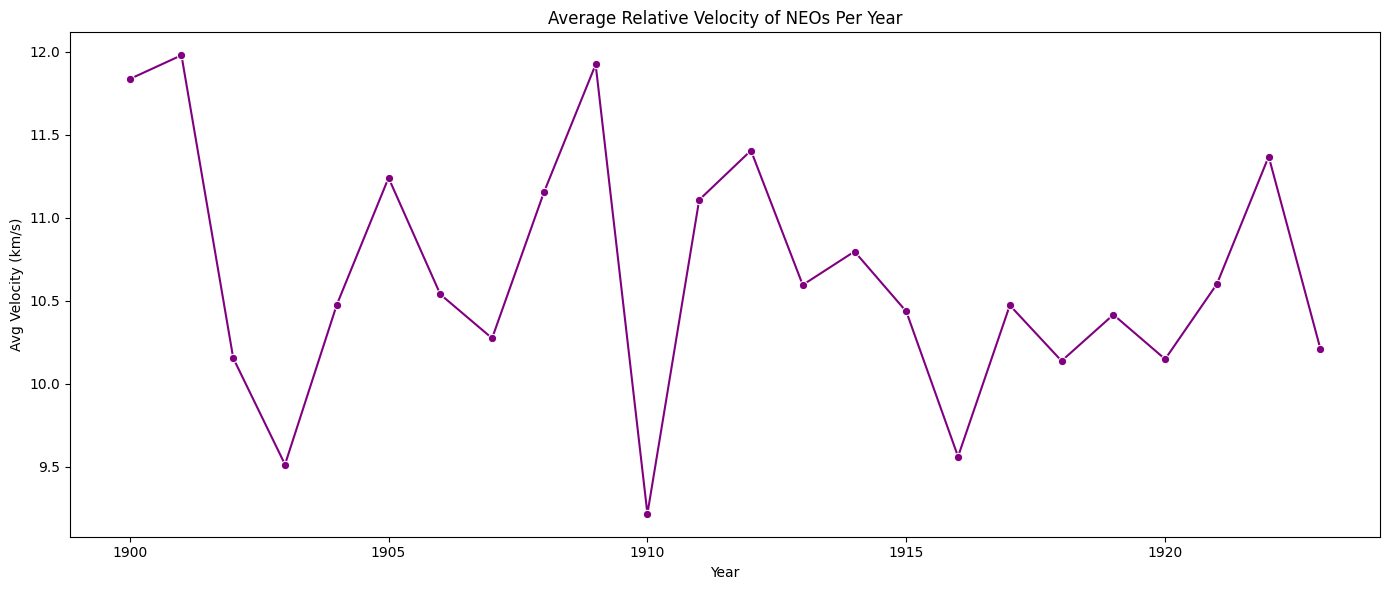

In [18]:
avg_velocity = data.groupby('Year')['Relative Velocity (km/s)'].mean()
plt.figure(figsize=(14,6))
sns.lineplot(x=avg_velocity.index, y=avg_velocity.values, color='purple', marker='o')
plt.title('Average Relative Velocity of NEOs Per Year')
plt.xlabel('Year')
plt.ylabel('Avg Velocity (km/s)')
plt.tight_layout()
plt.show()

#### Histogram of miss distances

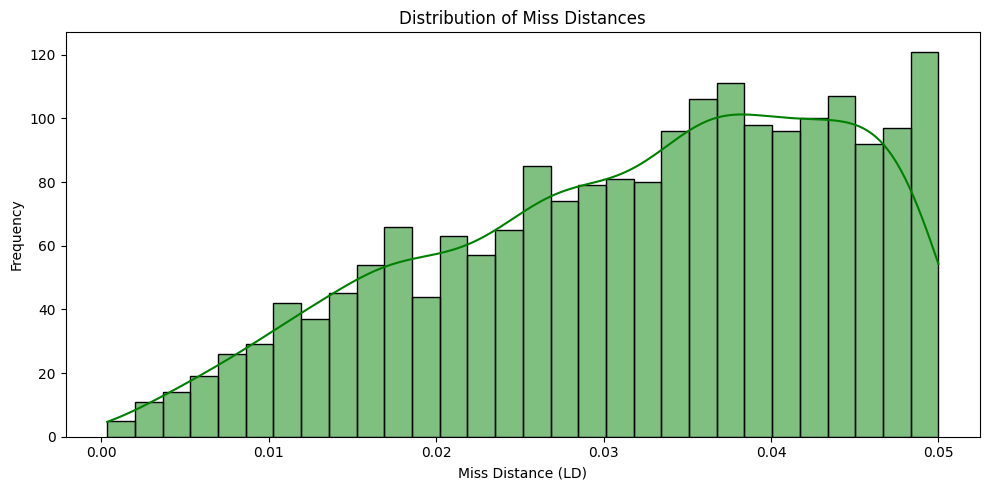

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data['Miss Distance (LD)'], bins=30, kde=True, color='green')
plt.title('Distribution of Miss Distances')
plt.xlabel('Miss Distance (LD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### =====================  Heatmap of correlation =====================

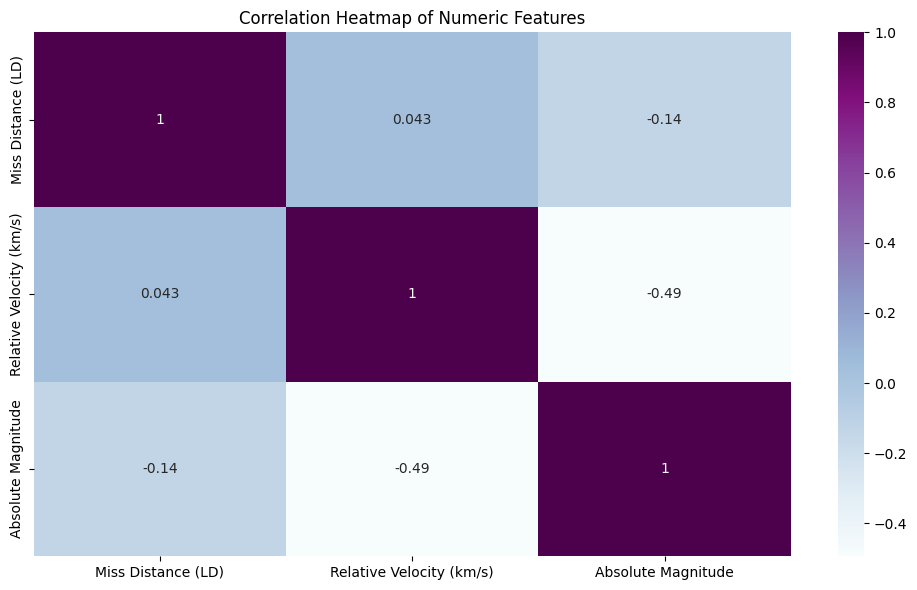

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(data[cols_to_numeric].corr(), annot=True, cmap='BuPu')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

                          Julian Date  Miss Distance (LD)  \
Julian Date                  1.000000           -0.001236   
Miss Distance (LD)          -0.001236            1.000000   
Minimum Distance (LD)       -0.012632            0.774300   
Maximum Distance (LD)       -0.007864            0.170502   
Relative Velocity (km/s)    -0.030058            0.042817   
Velocity Infinity (km/s)    -0.030393            0.044906   
Absolute Magnitude           0.038725           -0.136385   
Year                         0.999123           -0.000602   

                          Minimum Distance (LD)  Maximum Distance (LD)  \
Julian Date                           -0.012632              -0.007864   
Miss Distance (LD)                     0.774300               0.170502   
Minimum Distance (LD)                  1.000000              -0.183929   
Maximum Distance (LD)                 -0.183929               1.000000   
Relative Velocity (km/s)               0.094566               0.010733   
Veloci

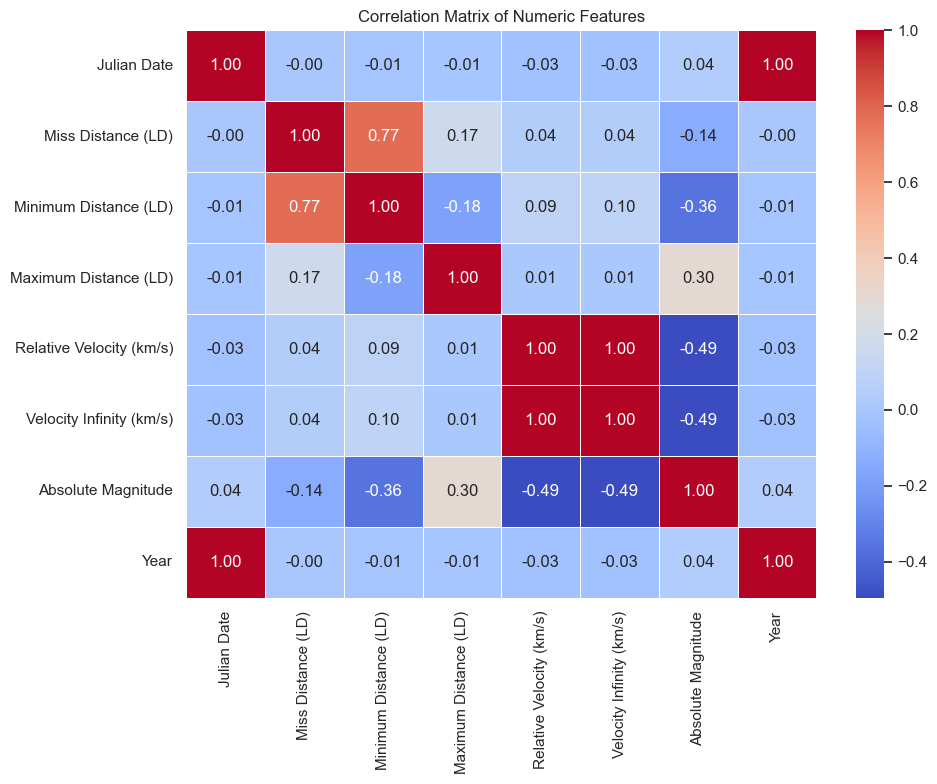

In [18]:
numeric_data = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


#### ===================== Bar plot: Average size per year =====================

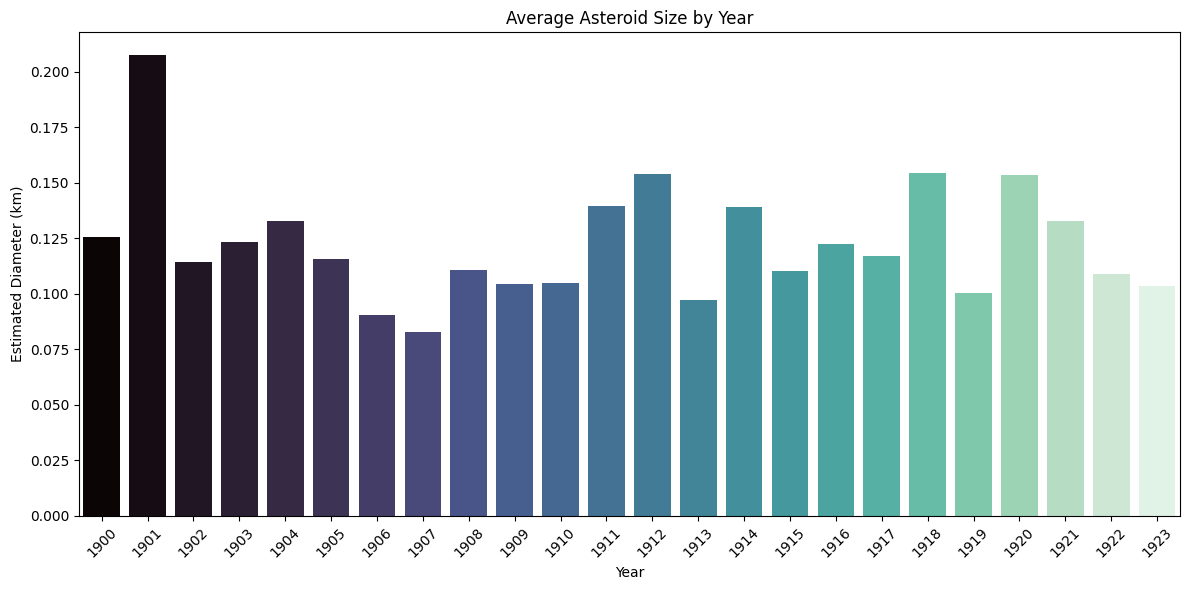

In [54]:
avg_size_per_year = data.groupby('Year')['Estimated Diameter (km)'].mean().reset_index().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_size_per_year,
    x='Year',
    y='Estimated Diameter (km)',
    hue='Year',              
    palette='mako',
    legend=False            
)

plt.title('Average Asteroid Size by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Diameter (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_size_per_year.png")
plt.show()


#### ==================== Pie chart: Size range distribution =====================


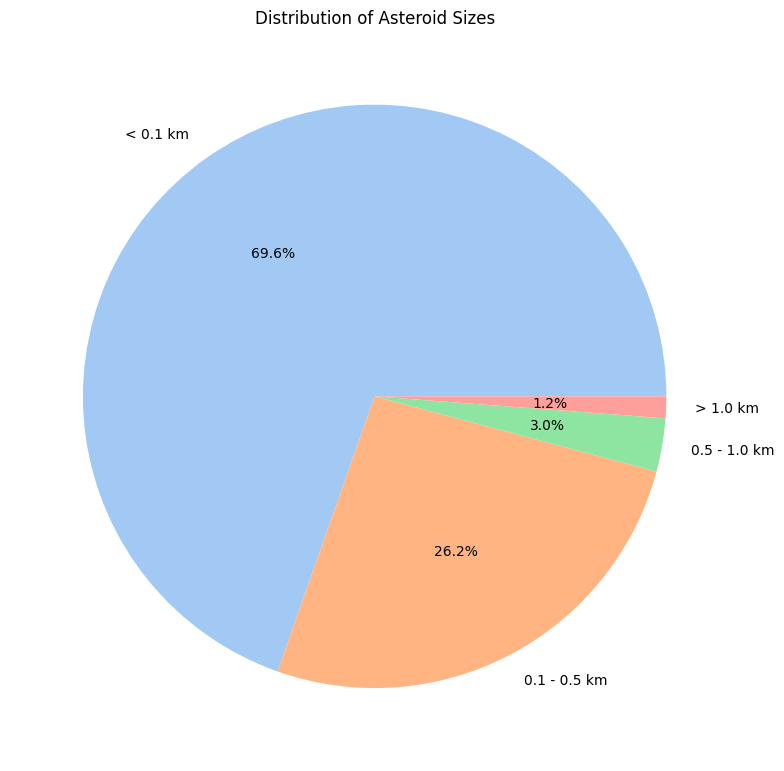

In [47]:
def classify_size(d):
    if d < 0.1:
        return "< 0.1 km"
    elif d < 0.5:
        return "0.1 - 0.5 km"
    elif d < 1.0:
        return "0.5 - 1.0 km"
    else:
        return "> 1.0 km"

size_class = data['Estimated Diameter (km)'].apply(classify_size)
plt.figure(figsize=(8,8))
size_class.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of Asteroid Sizes")
plt.ylabel('')
plt.tight_layout()
plt.savefig("size_distribution_pie.png")
plt.show()

#### =====================  Outlier Detection  =====================

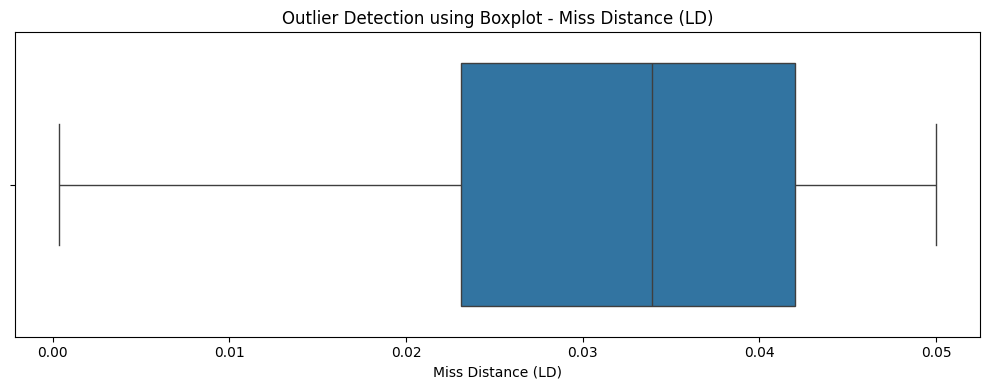

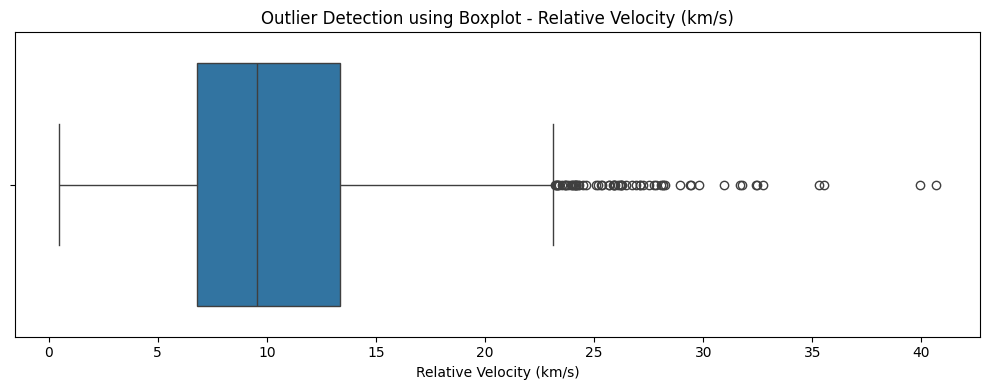

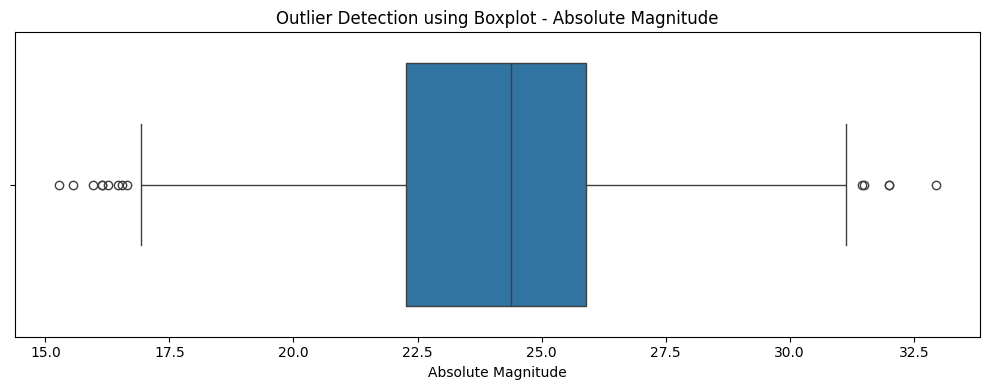

In [48]:
for col in cols_to_numeric:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Outlier Detection using Boxplot - {col}")
    plt.tight_layout()
    #plt.savefig(f"outlier_boxplot_{col.replace(' ', '_')}.png")
    plt.show()


#### =====================  Scatter Plot: Distance vs Velocity =====================

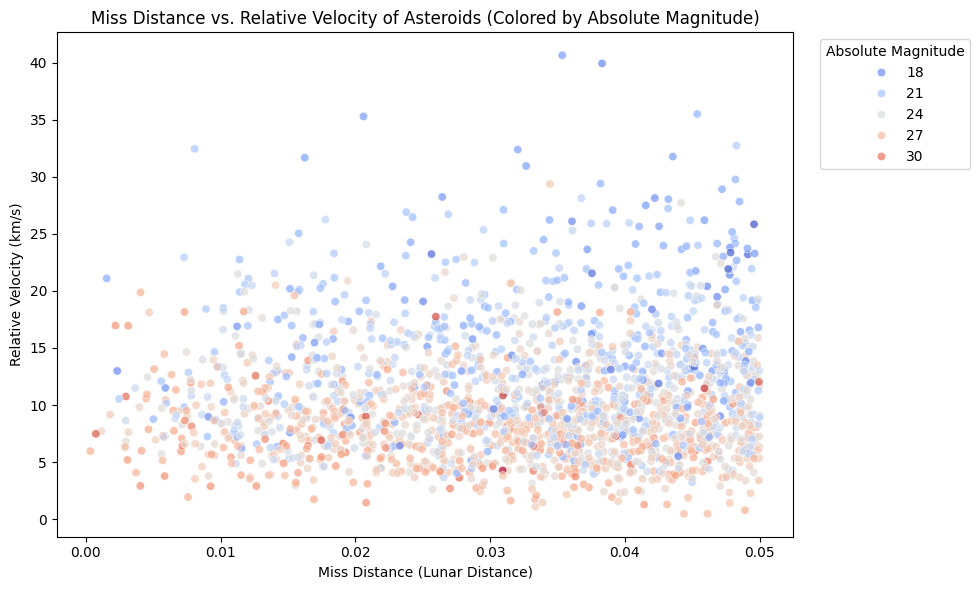

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x='Miss Distance (LD)',
    y='Relative Velocity (km/s)',
    hue='Absolute Magnitude',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Miss Distance vs. Relative Velocity of Asteroids (Colored by Absolute Magnitude)")
plt.xlabel("Miss Distance (Lunar Distance)")
plt.ylabel("Relative Velocity (km/s)")
plt.legend(title="Absolute Magnitude", loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.savefig("scatter_distance_velocity_magnitude.png")
plt.show()

#### Top 10 closest approaches

In [52]:
closest_10 = data.nsmallest(10, 'Miss Distance (LD)')
print("\nTop 10 Closest Approaches:")
print(closest_10[['Name', 'Close Approach Date', 'Miss Distance (LD)', 'Relative Velocity (km/s)']])


Top 10 Closest Approaches:
           Name Close Approach Date  Miss Distance (LD)  \
1877    2017 LD 1922-06-07 23:27:00            0.000347   
1616   2024 FQ5 1919-04-02 00:54:00            0.000750   
887   2007 JB21 1910-05-09 08:37:00            0.001169   
1268     152680 1914-12-31 12:00:00            0.001559   
1735   2023 VC7 1920-06-21 18:25:00            0.001811   
956     2025 FC 1911-03-18 17:36:00            0.002206   
1565     458732 1918-09-17 22:24:00            0.002340   
1981   2021 MK1 1923-06-26 01:07:00            0.002466   
1526     367943 1918-02-17 03:50:00            0.002894   
1734    2017 MF 1920-06-20 17:53:00            0.002925   

      Relative Velocity (km/s)  
1877                  5.963739  
1616                  7.475330  
887                   7.699718  
1268                 21.104455  
1735                  9.151344  
956                  16.966726  
1565                 12.988605  
1981                 10.534885  
1526                  6.2

#### T -test

In [13]:
from scipy.stats import ttest_ind
import numpy as np

# Convert necessary columns to numeric (if not already)
data['Minimum Distance (LD)'] = pd.to_numeric(data['Minimum Distance (LD)'], errors='coerce')
data['Absolute Magnitude'] = pd.to_numeric(data['Absolute Magnitude'], errors='coerce')

# Define "hazardous" based on a condition (e.g., minimum distance < 1 and/or brightness < 22)
data['Hazardous'] = (data['Minimum Distance (LD)'] < 1) & (data['Absolute Magnitude'] < 22)

# Drop rows with NaN
filtered_data = data[['Hazardous', 'Miss Distance (LD)']].dropna()

# Create two groups
hazardous = filtered_data[filtered_data['Hazardous'] == True]['Miss Distance (LD)']
non_hazardous = filtered_data[filtered_data['Hazardous'] == False]['Miss Distance (LD)']

# Perform t-test
t_stat, p_value = ttest_ind(hazardous, non_hazardous)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 2.7231811366662417
P-Value: 0.006521894817663354


#### Chi-Square test


In [16]:

data['Hazardous'] = (data['Minimum Distance (LD)'] < 1) & (data['Absolute Magnitude'] < 22)

data['Distance Category'] = data['Miss Distance (LD)'].apply(lambda x: 'Near' if x < 1 else 'Far')

contingency_table = pd.crosstab(data['Hazardous'], data['Distance Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("Expected Frequencies:\n", expected)

Contingency Table:
 Distance Category  Near
Hazardous              
False              1554
True                446

Chi-square Statistic: 0.0
Degrees of Freedom: 0
P-Value: 1.0
Expected Frequencies:
 [[1554.]
 [ 446.]]
